In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import os
from tqdm.notebook import tqdm

from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.inspection import permutation_importance

In [52]:
path="../data/"
os.listdir(path)

['Fixated.csv', 'heart+disease', 'metadata.txt']

In [54]:
df=pd.read_csv(path+"fixated.csv")
labeltarget=["Tidak", "Ya"]
df.isna().sum()
len(df)

1025

In [4]:
#matrix corr
df.corr().style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [5]:
#ingpo dataset
df.describe().style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.000000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.592510,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Heart Disease Percentage')

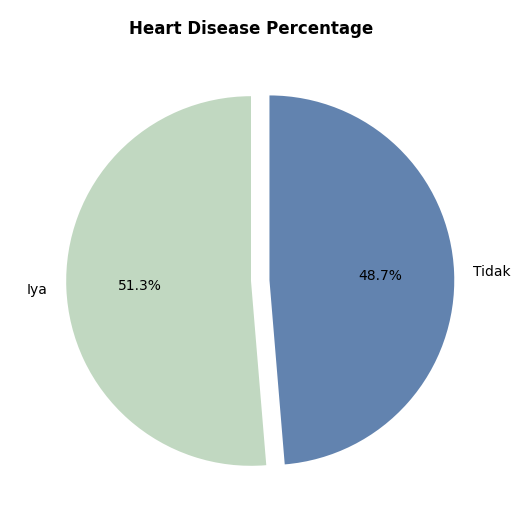

In [6]:
#Sample size
len(df)     #1025

#target==0 (Tidak sakit jantung)
len(df[df["target"]==0])            #499

#target==1 (Sakit jantung)
len(df[df["target"]==1])            #526


heart_percnt = df["target"].value_counts(normalize=True).to_dict()
plt.figure(figsize=(3,3),dpi=200)
labels = ["Iya", "Tidak"]
sizes = heart_percnt.values()
colors = ["#c1d8c1", "#6283af"]
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False,colors=colors, startangle=90, textprops={'fontsize': 5})
plt.title("Heart Disease Percentage", size=6, fontweight="bold")

C:\Users\Rhey\AppData\Local\Temp\ipykernel_28328\4010462676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['sex'] = temp['sex'].replace({1: 'M', 0: 'F'}).astype('category')
C:\Users\Rhey\AppData\Local\Temp\ipykernel_28328\4010462676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['target'] = temp['target'].replace({1: 'Ya', 0: 'Tidak'}).astype('category')


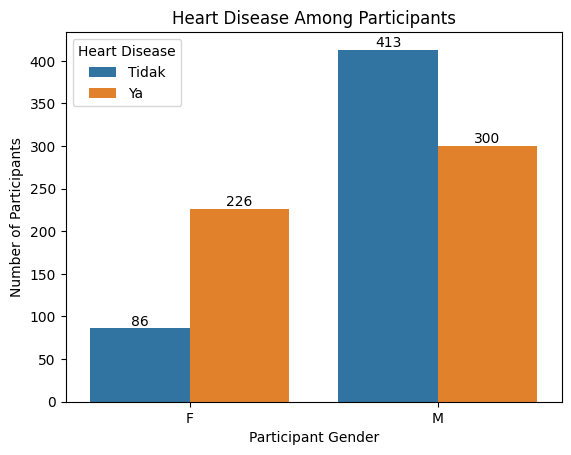

In [7]:
#Check target by sex
temp=df[["sex", "target"]]
temp['sex'] = temp['sex'].replace({1: 'M', 0: 'F'}).astype('category')
temp['target'] = temp['target'].replace({1: 'Ya', 0: 'Tidak'}).astype('category')
temp
fmc = sns.countplot(data=temp,x='sex',hue='target')

# Set a custom title for the hue in the legend
plt.legend(title="Heart Disease", loc='upper left',)
for i in fmc.containers:
    fmc.bar_label(i,)
fmc.set_title('Heart Disease Among Participants')
fmc.set_xlabel('Participant Gender')
fmc.set_ylabel('Number of Participants')

plt.show()

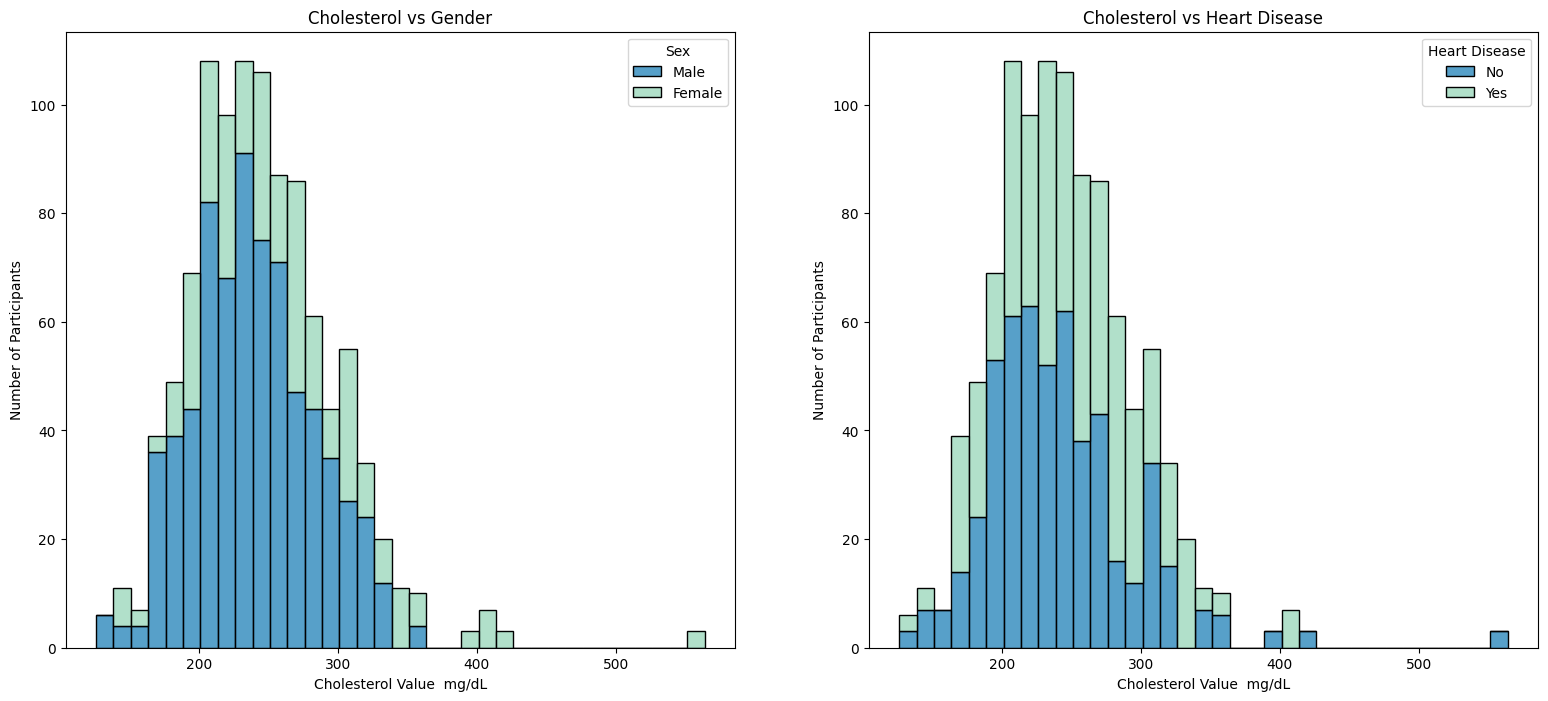

In [8]:
#cholestrol by sex and target
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 8))

sns.histplot(data=df, x="chol", hue="sex", multiple="stack", ax=ax1, palette= 'YlGnBu')
ax1.set_title('Cholesterol vs Gender')
ax1.set_xlabel('Cholesterol Value  mg/dL')
ax1.set_ylabel('Number of Participants')
legend1 = ax1.legend(title="Sex", labels=["Male", "Female"])

sns.histplot(data=df, x="chol", hue="target", multiple="stack", ax=ax2, palette= 'YlGnBu')
ax2.set_title('Cholesterol vs Heart Disease')
ax2.set_xlabel('Cholesterol Value  mg/dL')
ax2.set_ylabel('Number of Participants')
legend2 = ax2.legend(title="Heart Disease", labels=["No", "Yes"])


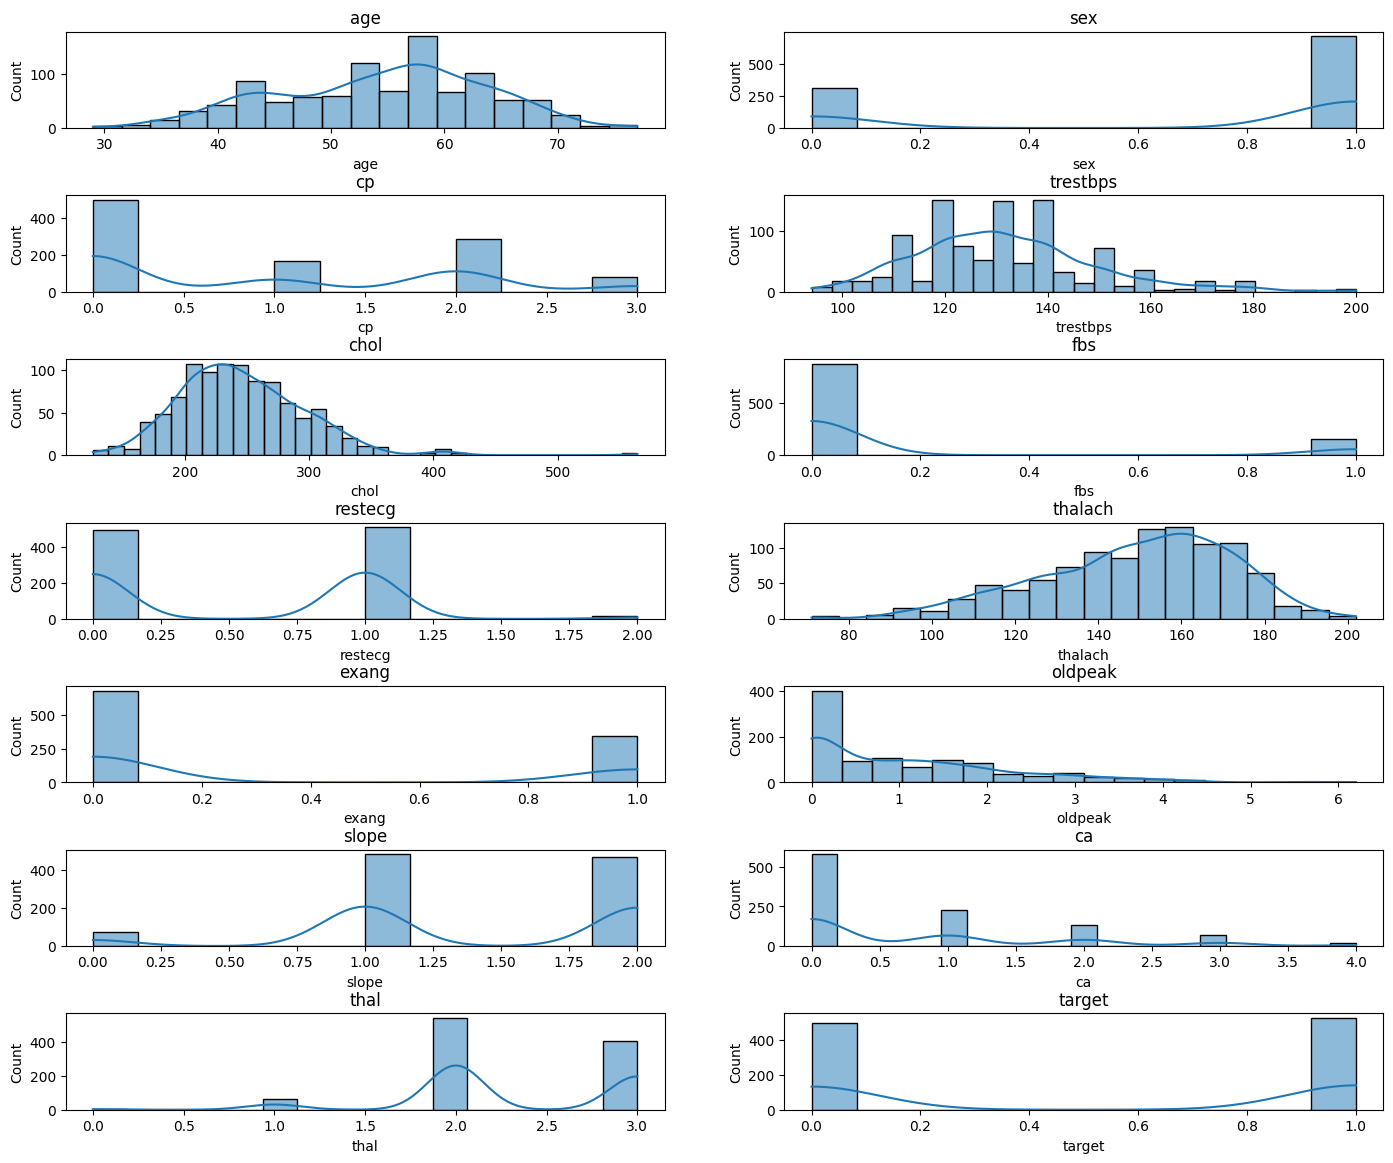

In [9]:
#check distribution by histogram
fig = plt.figure(figsize=(17,14))
fig.subplots_adjust(wspace=0.2, hspace=0.7)
for i, column in enumerate(df.columns):
    ax=fig.add_subplot(7,2,i+1)
    sns.histplot(data=df[column], kde=True)
    ax.set_title(column)

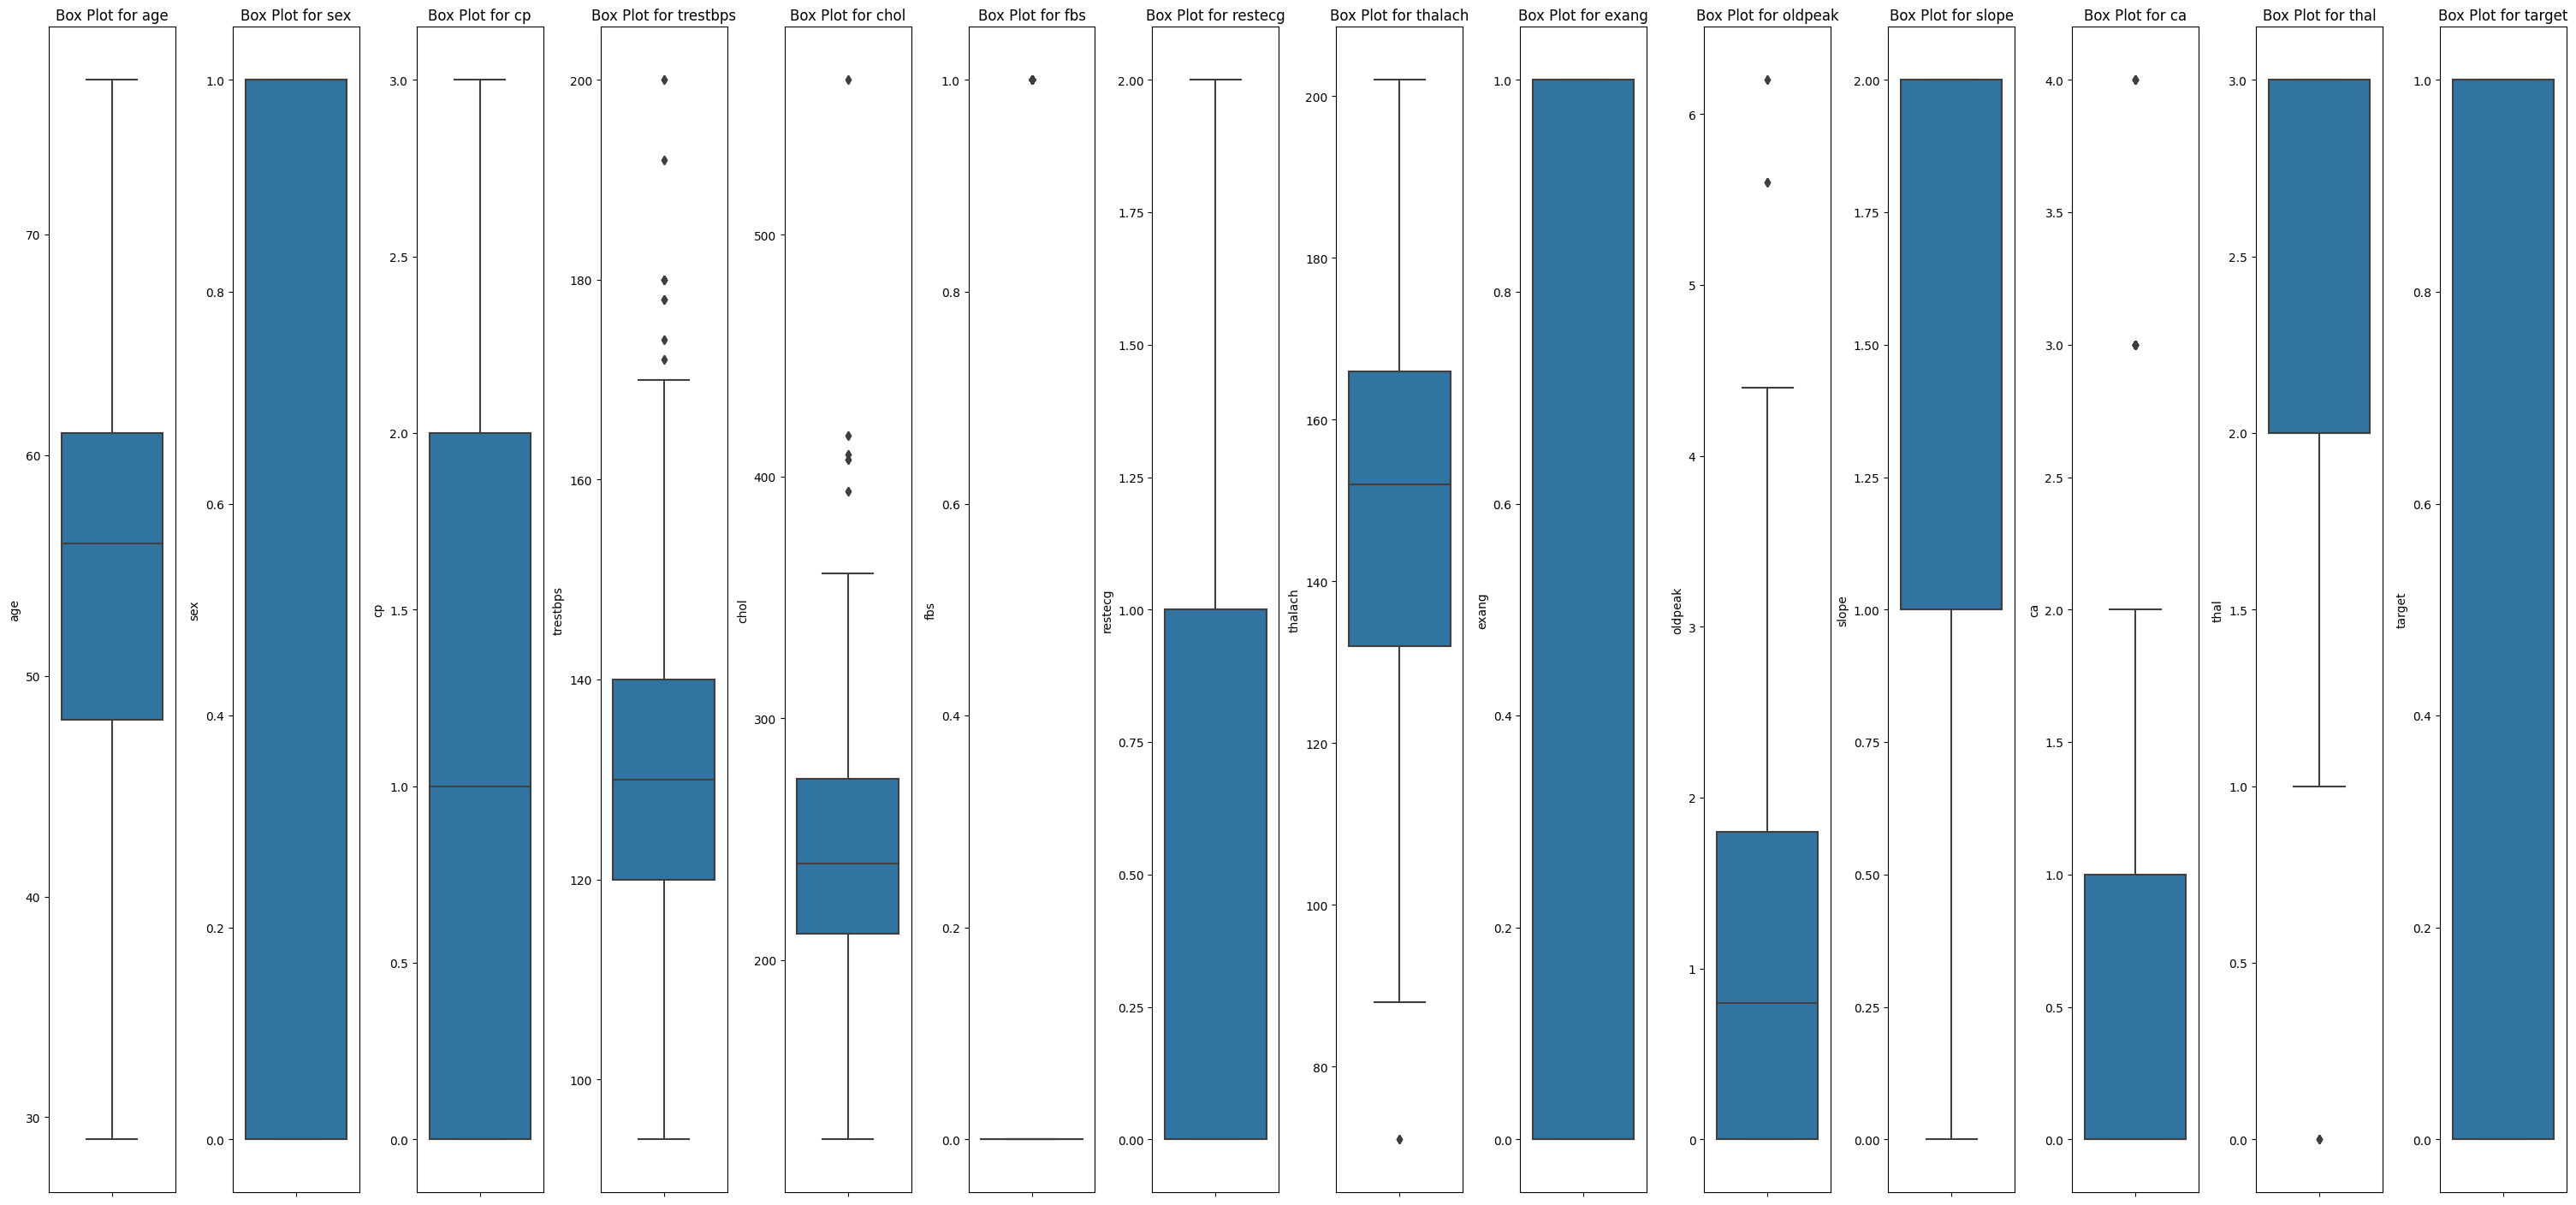

In [10]:
#check distribution by boxplot
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
fig, ax = plt.subplots(ncols=len(numeric_columns), figsize=(30, 14))

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=column, data=df, ax=ax[i], whis=1.5)

    ax[i].set_title(f'Box Plot for {column}')
    ax[i].set_xlabel('')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

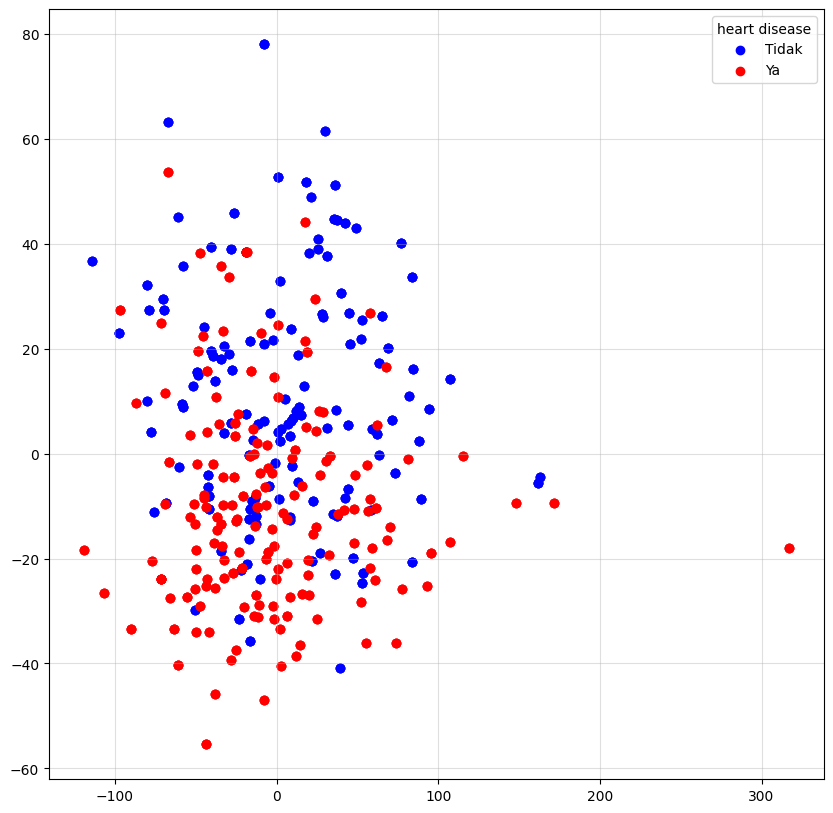

In [11]:
#visualize target by PCA after reduced to 2 dimension
X=df.copy()
y=X.pop("target").values
X=PCA(n_components=2).fit_transform(X)
c=["blue", "red"]
fig, ax = plt.subplots(figsize=(10, 10))
for i in np.unique(y):
    ax.scatter(X[y==i, 0], X[y==i, 1], c=c[i], label=labeltarget[i])
ax.legend(loc="upper right", title="heart disease")
ax.grid("on", alpha=0.4)

Text(0.5, 0, 'importance')

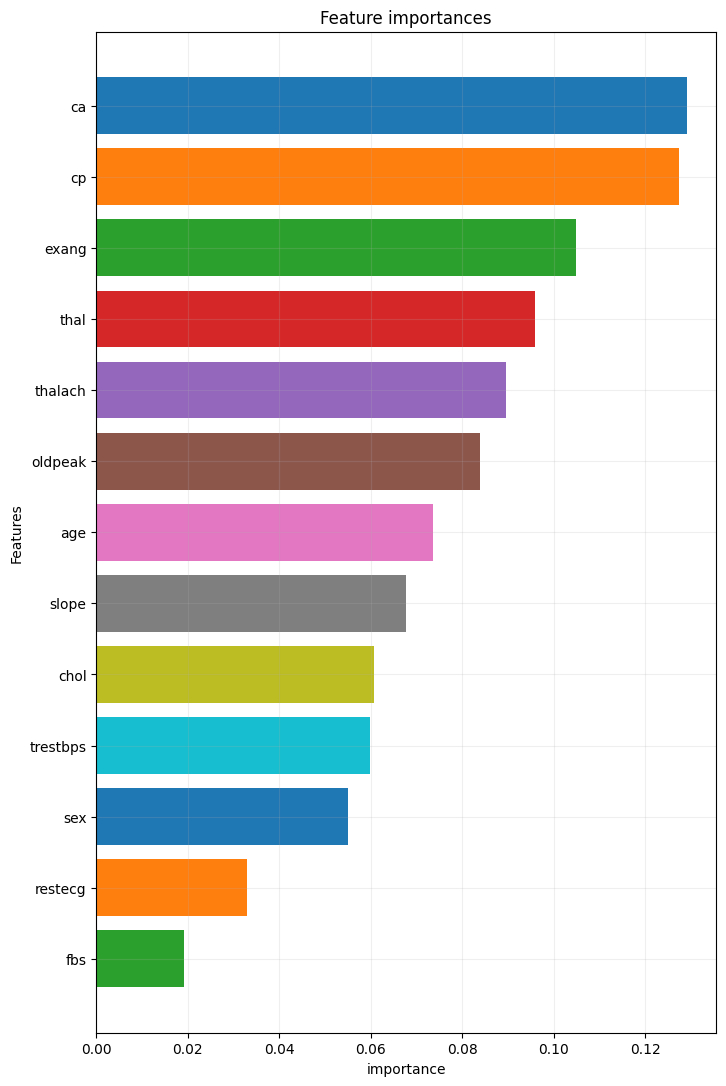

In [12]:
#Feature importance
fig, ax = plt.subplots(1,1, figsize=(8,13))
yes=ExtraTreesClassifier().fit(df.iloc[:,:-1],df.iloc[:,-1])
temp=sorted(list(zip(yes.feature_names_in_, yes.feature_importances_)), key=lambda x:x[1], reverse=True)
count=0;anothertemp=[]
for colname, importance in temp:
    count+=1
    ax.barh(colname, importance)
    ax.invert_yaxis()
ax.grid("on", alpha=0.2)
ax.set_title("Feature importances")
ax.set_ylabel("Features")
ax.set_xlabel("importance")

In [50]:
import plotly.graph_objects as go

temp1=np.array(sorted(list(zip(yes.feature_names_in_, yes.feature_importances_)), key=lambda x:x[1], reverse=False))
fig = go.Figure(data= go.Scatterpolar(r=temp1[:,1].astype(float),
                theta=temp1[:,0]))
fig.update_traces(fill="toself")
fig.update_layout({
    "plot_bgcolor": "rgba(0, 0, 0, 0)",
    "paper_bgcolor": "rgba(0, 0, 0, 0)",},
    polar=dict(
        radialaxis_angle= -45,
        angularaxis=dict(
            direction = "clockwise",
            period=6),
    ))
fig.update_polars(angularaxis_color="snow")
fig.update_polars(angularaxis_linecolor="snow")
fig.update_polars(radialaxis_linecolor="snow")
fig.update_polars(bgcolor="rgba(0, 0, 0, 0)")
fig.update_polars(radialaxis_tickfont_color="snow")
fig.write_image('../.img/Polar.png')
fig.show()